In [1]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from datetime import datetime, timedelta
# Load environment variables from .env file
load_dotenv()
ACCOUNT = os.getenv('ACCOUNT')
SERVER = os.getenv('SERVER')
PASSWORD = os.getenv("PASSWORD")

In [2]:
dataset = pd.read_csv('XAUUSDm_1min_data.csv')
x = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [3]:
dataset.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-10-25 01:16:00,2734.073,2734.073,2733.303,2733.824,134,159,0
1,2024-10-25 01:17:00,2733.853,2734.707,2733.486,2734.580,162,160,0
2,2024-10-25 01:18:00,2734.591,2734.779,2733.923,2734.775,173,160,0
3,2024-10-25 01:19:00,2734.804,2734.965,2734.204,2734.307,103,160,0
4,2024-10-25 01:20:00,2734.297,2734.503,2733.800,2733.921,153,160,0


In [4]:
print("\nMissing values:")
print(dataset.isnull().sum())


Missing values:
time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64


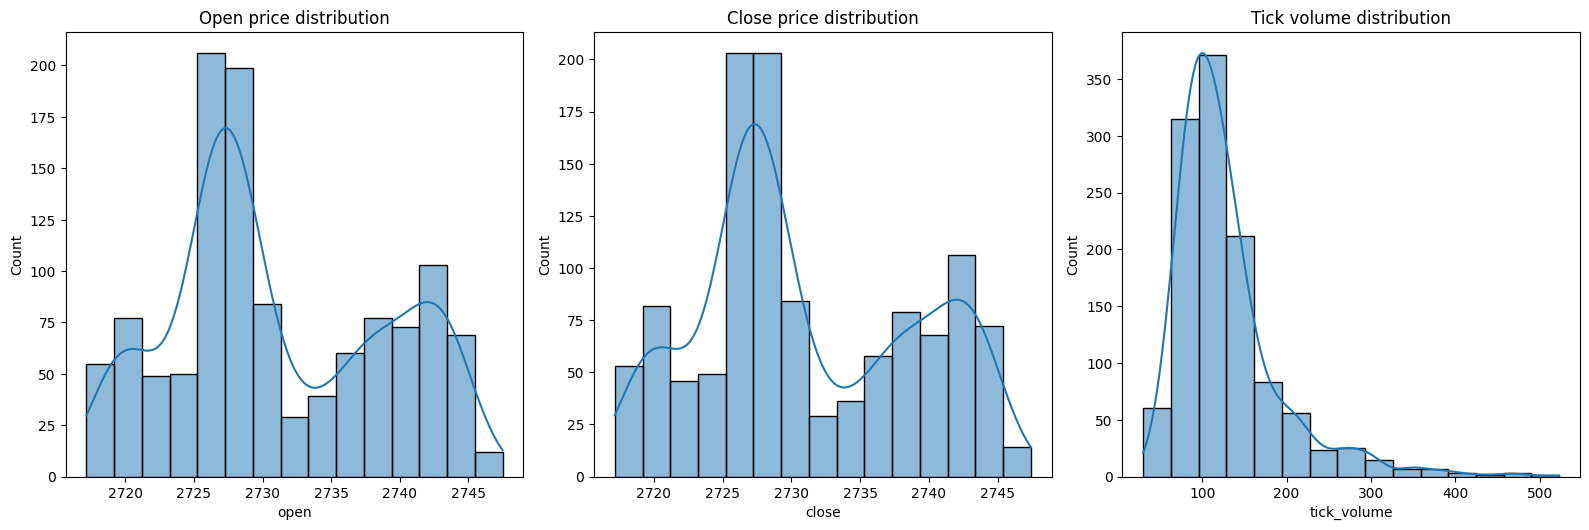

In [5]:
plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
sns.histplot(dataset['open'], bins=15, kde=True)
plt.title('Open price distribution')

plt.subplot(2,3,2)
sns.histplot(dataset['close'], bins=15, kde=True)
plt.title('Close price distribution')

plt.subplot(2,3,3)
sns.histplot(dataset['tick_volume'], bins=15, kde=True)
plt.title('Tick volume distribution')

plt.tight_layout()
plt.show()

In [6]:
def craw_data(symbol, time_frame, start_time, end_time):
    """
    Fetches historical data for a specified symbol, time frame, and date range.
    
    Parameters:
        symbol (str): The stock symbol to retrieve data for.
        time_frame (mt5.TIMEFRAME): Time frame for data retrieval, e.g., mt5.TIMEFRAME_M1 for 1 minute.
        start_time (datetime): Start date and time for data retrieval.
        end_time (datetime): End date and time for data retrieval.

    Returns:
        pd.DataFrame: DataFrame containing the historical data.
    """
    # Initialize MT5 connection
    if not mt5.initialize(login=int(ACCOUNT), server=SERVER,password=PASSWORD):
        print("Failed to initialize MT5.")
        return None

    # Retrieve data
    rates = mt5.copy_rates_range(symbol, time_frame, start_time, end_time)
    if rates is None:
        print(f"Failed to retrieve data for {symbol}.")
        return None

    # Shutdown MT5 connection
    mt5.shutdown()

    # Convert to DataFrame
    data = pd.DataFrame(rates)
    data['time'] = pd.to_datetime(data['time'], unit='s')
    return data

In [7]:
symbol = "XAUUSDm"
end_time = datetime.now()
start_time = end_time - timedelta(minutes=1440)
time_frame = mt5.TIMEFRAME_M1
data = craw_data(symbol, time_frame, start_time, end_time)
print(data)

                    time      open      high       low     close  tick_volume  \
0    2024-10-28 03:31:00  2733.360  2733.367  2733.066  2733.230           70   
1    2024-10-28 03:32:00  2733.189  2733.189  2732.850  2732.851           78   
2    2024-10-28 03:33:00  2732.854  2733.108  2732.854  2732.913           59   
3    2024-10-28 03:34:00  2732.888  2733.142  2732.788  2732.868           92   
4    2024-10-28 03:35:00  2732.865  2733.006  2732.477  2732.853           62   
...                  ...       ...       ...       ...       ...          ...   
1372 2024-10-29 03:26:00  2750.047  2750.637  2749.868  2750.449          139   
1373 2024-10-29 03:27:00  2750.413  2750.507  2749.794  2750.022          114   
1374 2024-10-29 03:28:00  2750.052  2750.052  2749.013  2749.102          113   
1375 2024-10-29 03:29:00  2749.090  2749.534  2748.845  2748.927          141   
1376 2024-10-29 03:30:00  2748.881  2748.881  2748.561  2748.803           40   

      spread  real_volume  